# Deep Learning

## Concept

One of goal of the deep learning algorithm is to find the best function with minimum lost value. Rather than manually adjusting the `weight` and `bias` of the function, we can use the `gradient descent` algorithm to find the best function.

`y = ax + b`

`a` is the weight and `b` is the bias.

In the case of three variables:

`z = ax + by + c`

`a` and `b` are the weights and `c` is the bias.

In [1]:
import numpy as np

x_data = np.random.rand(100) * 10
noise = np.random.normal(0, 2, x_data.shape)
y_data = 3*x_data + 8 + noise

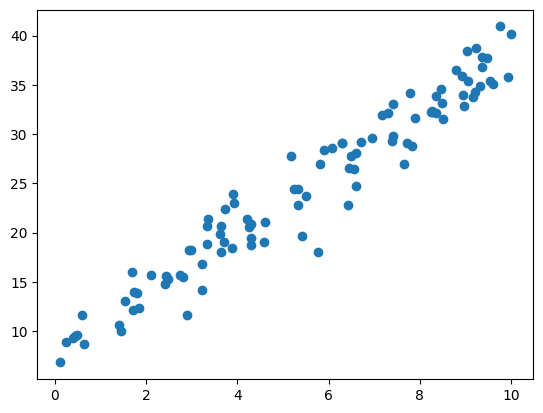

In [2]:
# plot the data

import matplotlib.pyplot as plt
plt.scatter(x_data, y_data)
plt.show()


Now let's create a simple neural network to *automatically* find the best function.

(You may skip the code at this moment, we will explain it in the next section.)

In [3]:
# solve the equation above using pytorch

import torch

class MySimpleNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


def loss(y, y_pred):
    return ((y_pred - y)**2).mean()


model = MySimpleNeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

x_tensor = torch.from_numpy(x_data).float().view(-1, 1)
y_tensor = torch.from_numpy(y_data).float().view(-1, 1)

for epoch in range(100):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}, loss {l.item():.4f}, w {model.linear.weight.item():.4f}, b {model.linear.bias.item():.4f}')


epoch 1, loss 652.7782, w 3.0671, b 1.3473
epoch 11, loss 12.6758, w 3.9102, b 1.7412
epoch 21, loss 12.0039, w 3.8733, b 1.9969
epoch 31, loss 11.3861, w 3.8380, b 2.2421
epoch 41, loss 10.8182, w 3.8041, b 2.4772
epoch 51, loss 10.2960, w 3.7716, b 2.7027
epoch 61, loss 9.8159, w 3.7404, b 2.9188
epoch 71, loss 9.3745, w 3.7105, b 3.1261
epoch 81, loss 8.9686, w 3.6818, b 3.3249
epoch 91, loss 8.5955, w 3.6543, b 3.5154


Text(0.5, 1.0, 'y = 3.6306x + 3.6802')

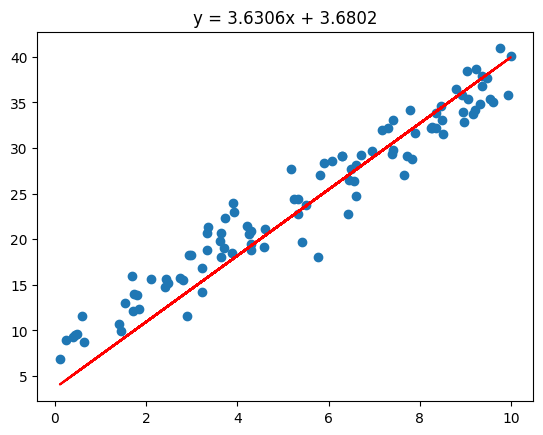

In [4]:
# Plot the result
plt.scatter(x_data, y_data)
plt.plot(x_data, model(x_tensor).detach().numpy(), 'r')

plt.title('y = {:.4f}x + {:.4f}'.format(model.linear.weight.item(), model.linear.bias.item()))

Let's continue with more epoch

In [5]:

for epoch in range(200):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}, loss {l.item():.4f}, w {model.linear.weight.item():.4f}, b {model.linear.bias.item():.4f}')

epoch 1, loss 8.2524, w 3.6280, b 3.6982
epoch 11, loss 7.9370, w 3.6027, b 3.8734
epoch 21, loss 7.6470, w 3.5785, b 4.0414
epoch 31, loss 7.3803, w 3.5553, b 4.2025
epoch 41, loss 7.1352, w 3.5330, b 4.3570
epoch 51, loss 6.9098, w 3.5116, b 4.5051
epoch 61, loss 6.7026, w 3.4911, b 4.6471
epoch 71, loss 6.5120, w 3.4715, b 4.7833
epoch 81, loss 6.3369, w 3.4527, b 4.9139
epoch 91, loss 6.1758, w 3.4346, b 5.0391
epoch 101, loss 6.0277, w 3.4173, b 5.1591
epoch 111, loss 5.8916, w 3.4007, b 5.2742
epoch 121, loss 5.7664, w 3.3848, b 5.3846
epoch 131, loss 5.6513, w 3.3695, b 5.4905
epoch 141, loss 5.5455, w 3.3549, b 5.5919
epoch 151, loss 5.4482, w 3.3408, b 5.6893
epoch 161, loss 5.3588, w 3.3274, b 5.7826
epoch 171, loss 5.2765, w 3.3145, b 5.8720
epoch 181, loss 5.2009, w 3.3021, b 5.9578
epoch 191, loss 5.1314, w 3.2902, b 6.0401


Text(0.5, 1.0, 'y = 3.2800x + 6.1112')

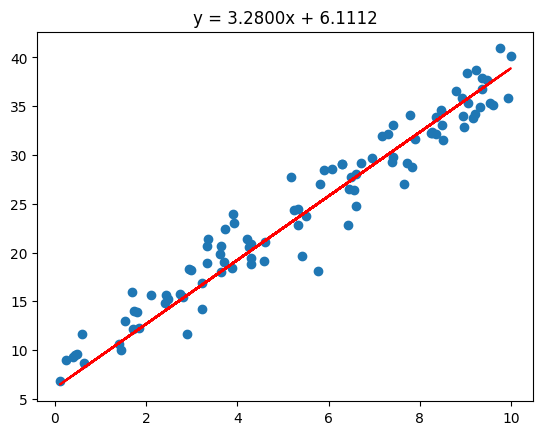

In [6]:
# Plot the result
plt.scatter(x_data, y_data)
plt.plot(x_data, model(x_tensor).detach().numpy(), 'r')

plt.title('y = {:.4f}x + {:.4f}'.format(model.linear.weight.item(), model.linear.bias.item()))

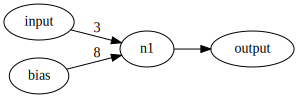

In [7]:
from fastbook import *

#Visualize the neural network, input -> node -> output
gv('''
input -> "n1" [label=3]
bias -> "n1" [label=8]
"n1" -> output
''')

Experiment more here: https://playground.tensorflow.org/

## Non Linear Function

Some problems doesn't have linear relationship. In this case, linear function is not enough to solve the problem. We need to use non-linear function.

Example:

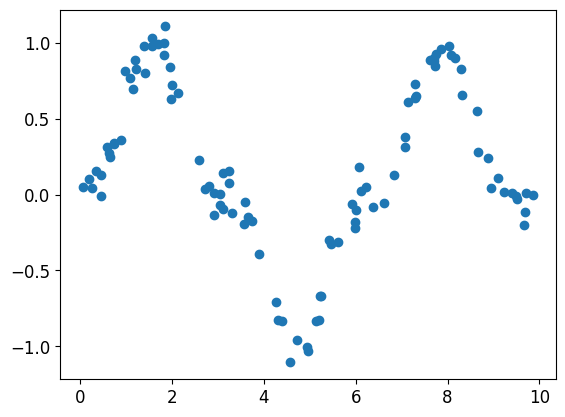

In [8]:
# create a non linear data with single feature
# y = sin(x) + noise

x_data = np.random.rand(100) * 10
noise = np.random.normal(0, 0.1, x_data.shape)
y_data = np.sin(x_data) ** 3 + noise

# plot the data
plt.scatter(x_data, y_data)
plt.show()


In [9]:
# solve the equation above using pytorch

import torch

class MySimpleNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


def loss(y, y_pred):
    return ((y_pred - y)**2).mean()


model = MySimpleNeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

x_tensor = torch.from_numpy(x_data).float().view(-1, 1)
y_tensor = torch.from_numpy(y_data).float().view(-1, 1)

for epoch in range(100):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}, loss {l.item():.4f}, w {model.linear.weight.item():.4f}, b {model.linear.bias.item():.4f}')


epoch 1, loss 23.5292, w 0.2300, b 0.7454
epoch 11, loss 0.3457, w -0.0781, b 0.6744
epoch 21, loss 0.3408, w -0.0748, b 0.6526
epoch 31, loss 0.3364, w -0.0716, b 0.6320
epoch 41, loss 0.3324, w -0.0686, b 0.6124
epoch 51, loss 0.3289, w -0.0658, b 0.5940
epoch 61, loss 0.3258, w -0.0631, b 0.5765
epoch 71, loss 0.3229, w -0.0606, b 0.5600
epoch 81, loss 0.3204, w -0.0582, b 0.5443
epoch 91, loss 0.3182, w -0.0559, b 0.5295


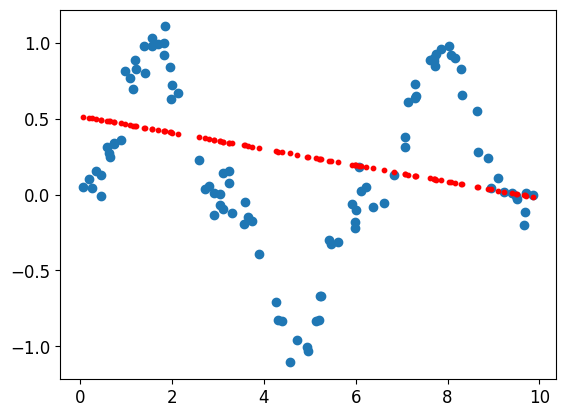

In [10]:
# Plot the model
plt.scatter(x_data, y_data)
plt.scatter(x_data, model(x_tensor).detach().numpy(), s=10, c='r')

plt.show()

Our linear function is not good enough. How about if we add more layer?

In [11]:
# solve the equation above using pytorch

import torch

class MySimpleNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(1, 10)
        self.linear_2 = torch.nn.Linear(10, 10)
        self.linear_3 = torch.nn.Linear(10, 1)

    def forward(self, x):
        return self.linear_3(self.linear_2(self.linear_1(x)))


def loss(y, y_pred):
    return ((y_pred - y)**2).mean()


model = MySimpleNeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

x_tensor = torch.from_numpy(x_data).float().view(-1, 1)
y_tensor = torch.from_numpy(y_data).float().view(-1, 1)

for epoch in range(100):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'epoch {epoch}, loss {l.item():.4f}')


epoch 0, loss 0.5562
epoch 10, loss 0.3066
epoch 20, loss 0.3041
epoch 30, loss 0.3027
epoch 40, loss 0.3017
epoch 50, loss 0.3009
epoch 60, loss 0.3004
epoch 70, loss 0.3000
epoch 80, loss 0.2997
epoch 90, loss 0.2995


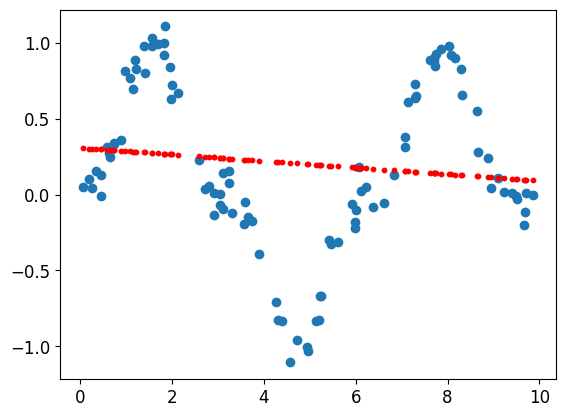

In [12]:
# Plot the model
plt.scatter(x_data, y_data)
plt.scatter(x_data, model(x_tensor).detach().numpy(), s=10, c='r')

plt.show()

Hmm not good enough, we need to add non-linearity to our function.

In [13]:
# solve the equation above using pytorch

import torch

class MySimpleNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(1, 100)
        self.linear_2 = torch.nn.Linear(100, 100)
        self.linear_3 = torch.nn.Linear(100, 1)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        return self.linear_3(self.relu(self.linear_2(self.relu(self.linear_1(x)))))


def loss(y, y_pred):
    return ((y_pred - y)**2).mean()


model = MySimpleNeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

x_tensor = torch.from_numpy(x_data).float().view(-1, 1)
y_tensor = torch.from_numpy(y_data).float().view(-1, 1)

for epoch in range(10000):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'epoch {epoch}, loss {l.item():.4f}')


epoch 0, loss 0.3812
epoch 1000, loss 0.1587
epoch 2000, loss 0.1307
epoch 3000, loss 0.1296
epoch 4000, loss 0.1295
epoch 5000, loss 0.1291
epoch 6000, loss 0.1287
epoch 7000, loss 0.1285
epoch 8000, loss 0.1282
epoch 9000, loss 0.1275


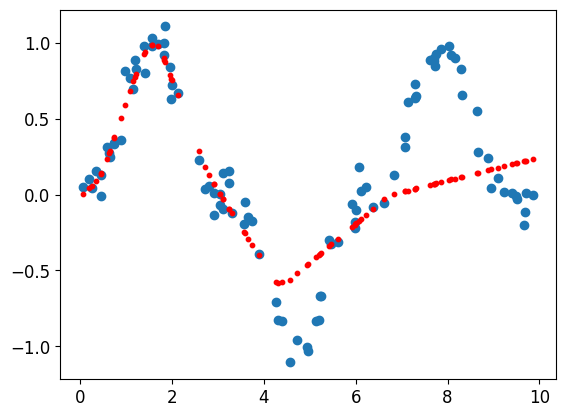

In [14]:
plt.scatter(x_data, y_data)
# Plot the model output using scatter plot
plt.scatter(x_data, model(x_tensor).detach().numpy(), s=10, c='r')

plt.show()

## Non Linear Function (3D)

How about non linear with two variables?


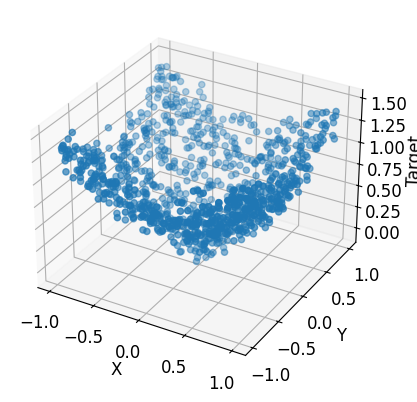

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate circle data set for regression
n_samples = 1000
X = np.random.rand(n_samples, 2) * 2 - 1
y = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
# add noise to y
y += 0.1 * np.random.randn(n_samples)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

# Set the x, y, and z labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Target')

plt.show()

In [16]:
# solve the equation above using pytorch

import torch

class MySimpleNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(2, 100)
        self.linear_2 = torch.nn.Linear(100, 100)
        self.linear_3 = torch.nn.Linear(100, 1)
        # self.relu = torch.nn.ReLU()

    def forward(self, x):
        # return self.relu(self.linear_3(self.relu(self.linear_2(self.relu(self.linear_1(x))))))
        return self.linear_3(self.linear_2(self.linear_1(x)))

loss = torch.nn.MSELoss()

model = MySimpleNeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

x_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float().view(-1, 1)

for epoch in range(1000):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'epoch {epoch+1}, loss {l.item():.4f}')


epoch 1, loss 0.6431
epoch 101, loss 0.0957
epoch 201, loss 0.0957
epoch 301, loss 0.0957
epoch 401, loss 0.0957
epoch 501, loss 0.0957
epoch 601, loss 0.0957
epoch 701, loss 0.0957
epoch 801, loss 0.0957
epoch 901, loss 0.0957


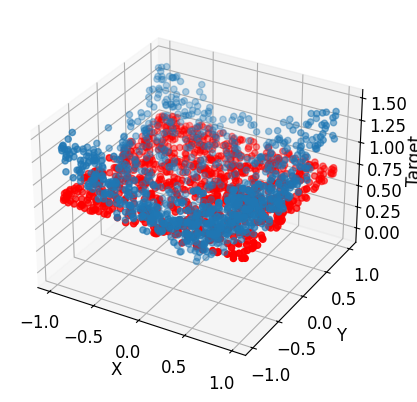

In [17]:
# Plot the result


# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

# Set the x, y, and z labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Target')

# draw the model
ax.scatter(X[:, 0], X[:, 1], model(x_tensor).detach().numpy(), c='r')

plt.show()

In [18]:
# solve the equation above using pytorch

import torch

class MySimpleNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(2, 100)
        self.linear_2 = torch.nn.Linear(100, 100)
        self.linear_3 = torch.nn.Linear(100, 1)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        return self.relu(self.linear_3(self.relu(self.linear_2(self.relu(self.linear_1(x))))))

loss = torch.nn.MSELoss()

model = MySimpleNeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

x_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float().view(-1, 1)

for epoch in range(1000):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'epoch {epoch+1}, loss {l.item():.4f}')


epoch 1, loss 0.6942
epoch 101, loss 0.0096
epoch 201, loss 0.0091
epoch 301, loss 0.0090
epoch 401, loss 0.0089
epoch 501, loss 0.0089
epoch 601, loss 0.0088
epoch 701, loss 0.0089
epoch 801, loss 0.0087
epoch 901, loss 0.0087


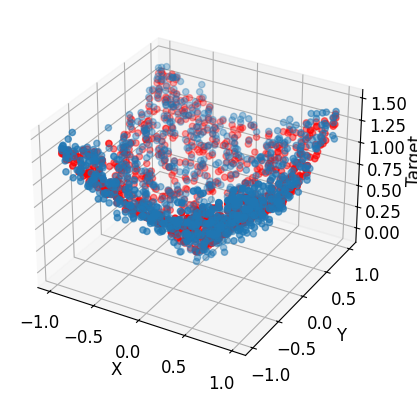

In [19]:
# Plot the result


# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

# Set the x, y, and z labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Target')

# draw the model
ax.scatter(X[:, 0], X[:, 1], model(x_tensor).detach().numpy(), c='r')

plt.show()